In [1]:
from RegridSami import latlonalt_to_cart

In [2]:
from utility_programs.read_routines import SAMI

In [64]:
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator, griddata
import numpy as np


from datetime import datetime
from tqdm.auto import tqdm
import xarray as xr

import matplotlib.pyplot as plt

In [23]:
samipath = '/petastore/phil/Prasoon_satellite_project/more_runs/20130317/sami-gitm-coupled/'

In [24]:
nz, nf, nlt, nt=SAMI.get_grid_elems_from_parammod(samipath)
old_shape=[nlt, nf, nz]

In [25]:
grid=SAMI.get_sami_grid(samipath, nlt, nf, nz)

In [27]:
mask = np.where(grid['alt'] < 2500)
for k in grid2.keys():
    grid[k]=grid[k][mask].flatten()

In [30]:
in_cart=latlonalt_to_cart(grid['glat'], grid['glon'], grid['malt']).T

In [31]:
tri = Delaunay(in_cart)

In [32]:
in_cart.shape

(1330560, 3)

In [37]:
latout=np.arange(-90, 90, 1)
lonout=np.arange(0, 360, 1)
altout=np.arange(200, 2200, 100)

out_lats=[]
out_lons=[]
out_alts=[]

for a in latout:
    for o in lonout:
        for l1 in altout:
            out_lats.append(a)
            out_lons.append(o)
            out_alts.append(l1)

out_cart=latlonalt_to_cart(
    out_lats, out_lons, np.array(out_alts) + 6371)

In [39]:
data, times=SAMI.read_to_nparray(
                samipath, datetime(2011,3,16), cols='edens', pbar=True,
                skip_time_check=True)

reading SAMI data:   0%|          | 0/597 [00:00<?, ?it/s]

In [50]:
interpd = []

for t in tqdm(range(len(times))):
    interp = LinearNDInterpolator(tri, data['data']['edens'][:,:,:,t][mask].flatten(), )
    interpd.append(interp(out_cart.T))

  0%|          | 0/597 [00:00<?, ?it/s]

In [54]:
ds=xr.Dataset(coords={
                'time': (['time'], times),
                'alt': (['alt'], altout),
                'lat': (['lat'], latout),
                'lon': (['lon'], lonout)},)
varname=list(data['data'].keys())[0]

In [56]:
ds[varname]=(('time', 'lat', 'lon', 'alt'),
             np.array(interpd).reshape(
                 len(times), len(latout), len(lonout), len(altout)))

In [57]:
ds

<xarray.Dataset>
Dimensions:  (time: 597, alt: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2011-03-16 ... 2011-03-18T01:39:54
  * alt      (alt) int64 200 300 400 500 600 700 ... 1700 1800 1900 2000 2100
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 83 84 85 86 87 88 89
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    edens    (time, lat, lon, alt) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

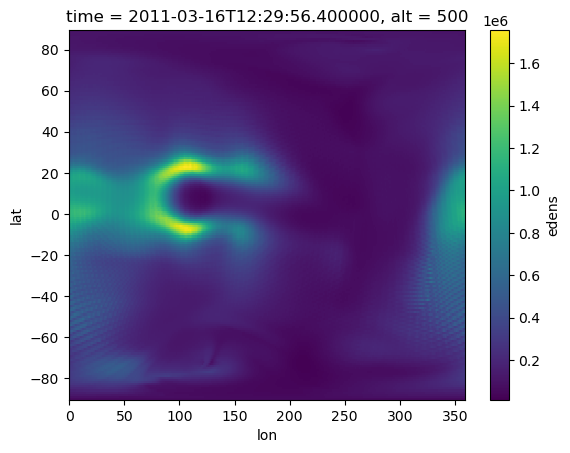

In [61]:
ds.edens.isel(time=150, alt=3).plot(x='lon')

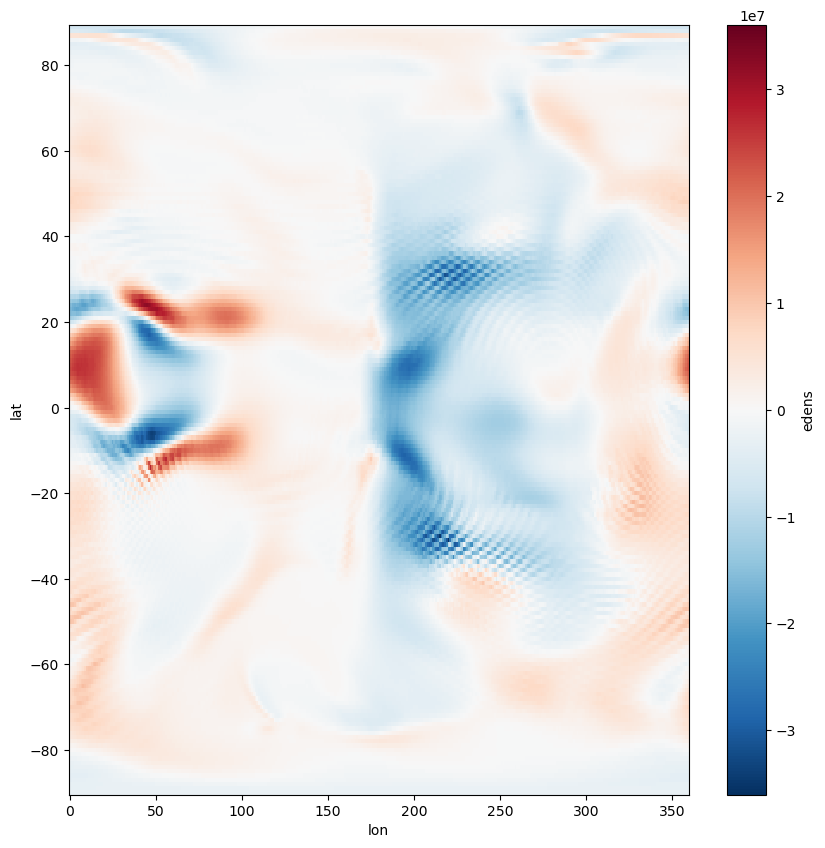

In [67]:
plt.figure(figsize=(10,10))
(ds.edens.isel(time=500)-ds.edens.isel(time=502)).integrate('alt').plot(x='lon')
plt.show()

In [ ]:
nearest_pt = [nlt, nf, nz]

[[nlt-1, nf-1, nz-1],
]

In [68]:
import itertools

In [ ]:
nlt = 30
nf = 50
nz = 70

In [70]:
for i in itertools.product([nlt-1, nlt, nlt+1], [nf-1, nf, nf+1], [nz-1,nz, nz+1]):
    print(i)

(79, 71, 255)
(79, 71, 256)
(79, 71, 257)
(79, 72, 255)
(79, 72, 256)
(79, 72, 257)
(79, 73, 255)
(79, 73, 256)
(79, 73, 257)
(80, 71, 255)
(80, 71, 256)
(80, 71, 257)
(80, 72, 255)
(80, 72, 256)
(80, 72, 257)
(80, 73, 255)
(80, 73, 256)
(80, 73, 257)
(81, 71, 255)
(81, 71, 256)
(81, 71, 257)
(81, 72, 255)
(81, 72, 256)
(81, 72, 257)
(81, 73, 255)
(81, 73, 256)
(81, 73, 257)
